<a href="https://colab.research.google.com/github/HrideshSingh/MachineLearningLab/blob/main/Implement_k_NN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement k-NN Algorithm

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome',axis=1).values
Y = df['Outcome'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42, stratify=Y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Setup a knn classifier with k neighbors

In [8]:
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

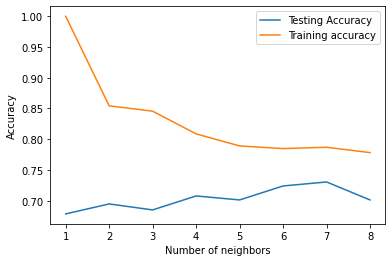

In [9]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.7305194805194806

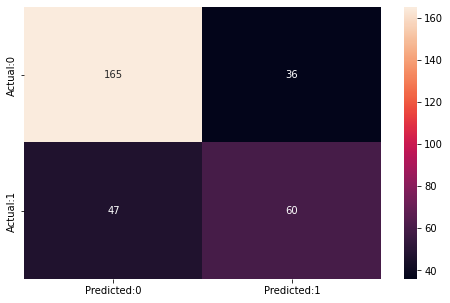

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
confusion_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(confusion_matrix, annot=True,fmt='d')

Total Correct Prediction = 165 + 60 = 225

Total Incorrect Prediction = 47 + 36 = 83

True Positive = 60

True negative = 165

False Positive = 36

False negative = 47
